# Import packages

In [129]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
# suppress warning
import warnings
warnings.filterwarnings('ignore')

# Read file

In [130]:
cyc = pd.read_csv('tfl-daily-cycle-hires.csv')

In [131]:
cyc

,Day,Number of Bicycle Hires,Unnamed: 2,Month,Number of Bicycle Hires.1,Unnamed: 5,Year,Number of Bicycle Hires.2,Unnamed: 8,Month.1,Average Hire Time (mins),Unnamed: 11
0,30/7/2010,"6,897",NaN,Jul 10,"12,461",NaN,2010,"2,180,813",NaN,Jul 10,17.0,NaN
1,31/7/2010,"5,564",NaN,Aug 10,"341,203",NaN,2011,"7,142,449",NaN,Aug 10,17.0,NaN
2,1/8/2010,"4,303",NaN,Sep 10,"540,859",NaN,2012,"9,519,283",NaN,Sep 10,15.0,NaN
3,2/8/2010,"6,642",NaN,Oct 10,"544,412",NaN,2013,"8,045,459",NaN,Oct 10,15.0,NaN
4,3/8/2010,"7,966",NaN,Nov 10,"456,304",NaN,2014,"10,023,897",NaN,Nov 10,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3834,27/1/2021,"12,479",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3835,28/1/2021,"13,783",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3836,29/1/2021,"14,807",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3837,30/1/2021,"7,915",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [132]:
# Dropping unnecessary columns
cyc = cyc.drop(['Unnamed: 2', 'Unnamed: 5','Unnamed: 8','Unnamed: 11','Year','Number of Bicycle Hires.2','Month.1', 
                'Average Hire Time (mins)', 'Number of Bicycle Hires.1','Month'], axis=1)
cyc.head(3)

,Day,Number of Bicycle Hires
0,30/7/2010,"6,897"
1,31/7/2010,"5,564"
2,1/8/2010,"4,303"


In [133]:
# Dealing with string
cyc['Number of Bicycle Hires'] = cyc['Number of Bicycle Hires'].str.replace(',', '').astype(int)

In [134]:
# Setting into datatime type
cyc.Day = pd.to_datetime(cyc.Day)
cyc['year'] = cyc['Day'].dt.year
cyc['month'] = cyc['Day'].dt.month
cyc['day'] = cyc['Day'].dt.day

In [135]:
# Selecting the required years
cyc_covid_19 = cyc.loc[(cyc['year'] == 2019)]
cyc_covid_20 = cyc.loc[(cyc['year'] == 2020)]
cyc_covid_21 = cyc.loc[(cyc['year'] == 2021)]

In [136]:
cyc_covid_19

,Day,Number of Bicycle Hires,year,month,day
3077,2019-01-01,14148,2019,1,1
3078,2019-02-01,19746,2019,2,1
3079,2019-03-01,21552,2019,3,1
3080,2019-04-01,20863,2019,4,1
3081,2019-05-01,13907,2019,5,1
...,...,...,...,...,...
3437,2019-12-27,11718,2019,12,27
3438,2019-12-28,11414,2019,12,28
3439,2019-12-29,12256,2019,12,29
3440,2019-12-30,16166,2019,12,30


In [137]:
# Groupping the required years with the number of bicycle hires
cyc_covid_19 = cyc_covid_19.groupby('month').agg({"Number of Bicycle Hires" : np.mean}) 
cyc_covid_20 = cyc_covid_20.groupby('month').agg({"Number of Bicycle Hires" : np.mean}) 
cyc_covid_21 = cyc_covid_21.groupby('month').agg({"Number of Bicycle Hires" : np.mean}) 

cyc_covid_19 = cyc_covid_19.reset_index()
cyc_covid_20 = cyc_covid_20.reset_index()
cyc_covid_21 = cyc_covid_21.reset_index()

In [138]:
# Changing into integer
cyc_covid_19['month']= cyc_covid_19['month'].astype(int)
cyc_covid_20['month']= cyc_covid_20['month'].astype(int)
cyc_covid_21['month']= cyc_covid_21['month'].astype(int)

In [139]:
# Creating a 'month' column to identify which month is it
import calendar
cyc_covid_19['month'] = cyc_covid_19['month'].apply(lambda x: calendar.month_name[x])
cyc_covid_20['month'] = cyc_covid_20['month'].apply(lambda x: calendar.month_name[x])
cyc_covid_21['month'] = cyc_covid_21['month'].apply(lambda x: calendar.month_name[x])

In [140]:
cyc_covid_19.head(3)

,month,Number of Bicycle Hires
0,January,24859.645161
1,February,28506.107143
2,March,27725.838710


# Visualisation

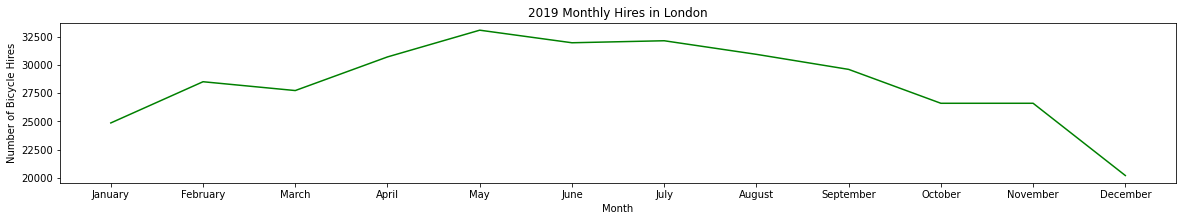

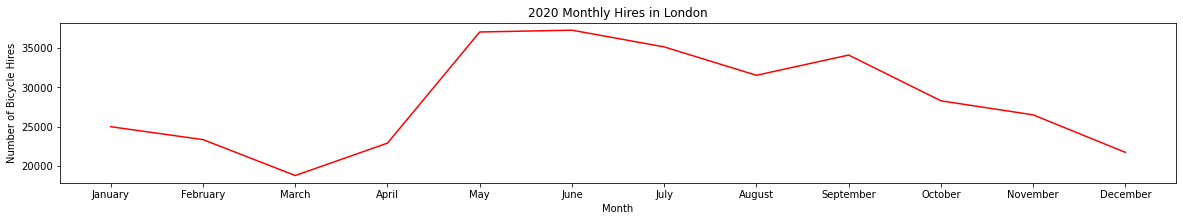

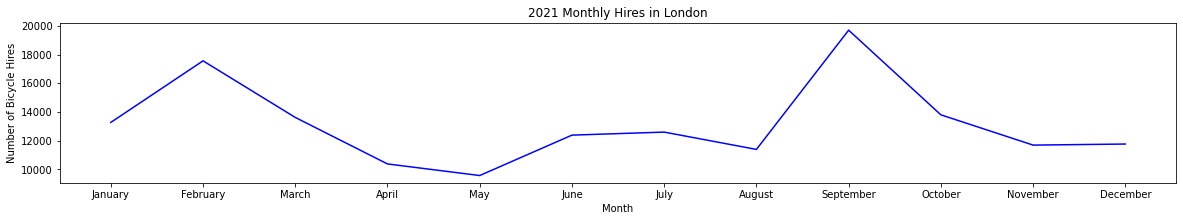

In [141]:
# Plot
Time_19 = cyc_covid_19['month']
Bic_hire_19 = cyc_covid_19['Number of Bicycle Hires']
Time_20 = cyc_covid_20['month']
Bic_hire_20 = cyc_covid_20['Number of Bicycle Hires']
Time_21 = cyc_covid_21['month']
Bic_hire_21 = cyc_covid_21['Number of Bicycle Hires']

plt.figure(figsize = (20,10))
plt.subplot(311)
plt.title('2019 Monthly Hires in London')
plt.xlabel('Month')
plt.ylabel('Number of Bicycle Hires')
London_line = plt.plot(Time_19,Bic_hire_19, color = 'green')

plt.figure(figsize = (20,10))
plt.subplot(312)
plt.title('2020 Monthly Hires in London')
plt.xlabel('Month')
plt.ylabel('Number of Bicycle Hires')
London_line = plt.plot(Time_20,Bic_hire_20, color = 'red')

plt.figure(figsize = (20,10))
plt.subplot(313)
plt.title('2021 Monthly Hires in London')
plt.xlabel('Month')
plt.ylabel('Number of Bicycle Hires')
London_line = plt.plot(Time_21,Bic_hire_21, color = 'blue')

# Creating dataframe for interactive chart

In [142]:
# Constructing a new dataframe for producing a transpose dataframe
period_19 = ['January19', 'February19','March19','April19','May19','June19','July19','August19','September19','October19',
         'November19','December19']
Year19 = ['2019', '2019','2019','2019','2019','2019','2019','2019','2019','2019',
         '2019','2019']
cyc_covid_19['period'] = period_19
cyc_covid_19['year'] = Year19

period_20 = ['January20', 'February20','March20','April20','May20','June20','July20','August20','September20','October20',
         'November20','December20']
Year20 = ['2020', '2020','2020','2020','2020','2020','2020','2020','2020','2020',
         '2020','2020']
cyc_covid_20['period'] = period_20
cyc_covid_20['year'] = Year20

period_21 = ['January21', 'February21','March21','April21','May21','June21','July21','August21','September21','October21',
         'November21','December21']
Year21 = ['2021', '2021','2021','2021','2021','2021','2021','2021','2021','2021',
         '2021','2021']
cyc_covid_21['period'] = period_21
cyc_covid_21['year'] = Year21

In [143]:
cyc_pre = pd.concat([cyc_covid_19, cyc_covid_20], ignore_index=True)
cyc_merge = pd.concat([cyc_pre, cyc_covid_21], ignore_index=True)
cyc_merge.rename({'Number of Bicycle Hires': 'Number_of_Bicycle_Hires'}, axis=1, inplace=True)
cyc_merge.reset_index(inplace=True)
cyc_merge.index.name = 'Index'
cyc_merge

,index,month,Number_of_Bicycle_Hires,period,year
Index,,,,,
0,0,January,24859.645161,January19,2019
1,1,February,28506.107143,February19,2019
2,2,March,27725.838710,March19,2019
3,3,April,30702.033333,April19,2019
4,4,May,33067.290323,May19,2019
5,5,June,31954.700000,June19,2019
6,6,July,32132.548387,July19,2019
7,7,August,30929.612903,August19,2019
8,8,September,29598.633333,September19,2019


In [144]:
#cyc_merge.to_csv('tfl.csv')

## Transpose

In [145]:
cyc_covid_19_t = cyc_covid_19.T
cyc_covid_20_t = cyc_covid_20.T
cyc_covid_21_t = cyc_covid_21.T
cyc_covid_19_t

,0,1,2,3,4,5,6,7,8,9,10,11
month,January,February,March,April,May,June,July,August,September,October,November,December
Number of Bicycle Hires,24859.6,28506.1,27725.8,30702,33067.3,31954.7,32132.5,30929.6,29598.6,26599.1,26599.8,20206.3
period,January19,February19,March19,April19,May19,June19,July19,August19,September19,October19,November19,December19
year,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019


In [146]:
# Dropping the period and year
cyc_covid_19_t = cyc_covid_19_t.drop(['period','year'], axis=0)
cyc_covid_19_t.rename({'Number of Bicycle Hires': '2019'}, axis=0, inplace=True)
cyc_covid_19_t.reset_index(inplace=True)
cyc_covid_19_t

cyc_covid_20_t = cyc_covid_20_t.drop(['period','year','month'], axis=0)
cyc_covid_20_t.rename({'Number of Bicycle Hires': '2020'}, axis=0, inplace=True)
cyc_covid_20_t.reset_index(inplace=True)
cyc_covid_20_t

cyc_covid_21_t = cyc_covid_21_t.drop(['period','year','month'], axis=0)
cyc_covid_21_t.rename({'Number of Bicycle Hires': '2021'}, axis=0, inplace=True)
cyc_covid_21_t.reset_index(inplace=True)
cyc_covid_21_t

,index,0,1,2,3,4,5,6,7,8,9,10,11
0,2021,13267.1,17560,13616,10374,9566,12382,12593,11387,19696,13796,11687,11761


In [147]:
# Combine all years into one
cyc_pre_t = pd.concat([cyc_covid_19_t, cyc_covid_20_t], ignore_index=True)
cyc_merge_t = pd.concat([cyc_pre_t, cyc_covid_21_t], ignore_index=True)
#cyc_merge_t.rename({'Number of Bicycle Hires': 'Number_of_Bicycle_Hires'}, axis=1, inplace=True)
#cyc_merge_t.reset_index(inplace=True)
#cyc_merge_t.index.name = 'Index'
cyc_merge_t

,index,0,1,2,3,4,5,6,7,8,9,10,11
0,month,January,February,March,April,May,June,July,August,September,October,November,December
1,2019,24859.6,28506.1,27725.8,30702,33067.3,31954.7,32132.5,30929.6,29598.6,26599.1,26599.8,20206.3
2,2020,25011,23369,18803.2,22926.9,37057,37286.2,35160.8,31549.7,34123.2,28305.5,26520.7,21751
3,2021,13267.1,17560,13616,10374,9566,12382,12593,11387,19696,13796,11687,11761


In [148]:
cyc_merge_t.to_csv('tfl_t.csv')